<a href="https://colab.research.google.com/github/warint/sc-applied-quantitative-finance/blob/master/GitHub_Copy_YolandeA_QFi_Explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explorations - Financial Time Series

######  Yolande Athaide

In [ ]:
# Environment and packages

import os
import pandas as pd
import numpy as np
#import math
import statistics
!pip3 install yfinance 
import yfinance as yf
from pandas_datareader import data as pdr

import pandas_datareader.data as web

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

plt.rcParams['figure.figsize'] = [12, 8]


In [ ]:
# Get data

mrna = pdr.get_data_yahoo('MRNA', start = '2019-01-01',end='2020-12-31')

print(mrna.shape)
mrna.head(10)

(505, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000
2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000
2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999
2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000
2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001
2019-01-09,17.250000,16.150000,17.200001,16.330000,1187400,16.330000
2019-01-10,16.510000,16.000000,16.360001,16.480000,487300,16.480000
2019-01-11,17.059999,16.530001,16.600000,17.000000,580600,17.000000
2019-01-14,17.059999,16.719999,17.000000,16.740000,612900,16.740000


In [ ]:
# Get a list of column names. 

display(list(mrna.columns))
print()
print()
print(mrna.info(null_counts = True))


['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       505 non-null    float64
 1   Low        505 non-null    float64
 2   Open       505 non-null    float64
 3   Close      505 non-null    float64
 4   Volume     505 non-null    int64  
 5   Adj Close  505 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.6 KB
None


In [ ]:
#### NB: No missing actual trading day data, but will utilize carry forward last trade info for wkends/hols

mrna.reset_index(inplace=True)
mrna.head()
records = len(mrna)

begin_dt = mrna['Date'].iloc[0]
end_dt = mrna['Date'].iloc[records-1]

all_dates = pd.DataFrame(pd.date_range(begin_dt,end_dt))

all_dates.columns =["Date"]
display(all_dates.head(10))
display(mrna.head(10))

mrna = all_dates.merge(mrna, how = "left", on= "Date")

mrna.set_index('Date', drop=True, append=False, inplace=False, verify_integrity=False)

# Last Obs Carried Fwd

mrna.fillna(method='ffill', inplace = True)
mrna.head()


,Date
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-05
4,2019-01-06
5,2019-01-07
6,2019-01-08
7,2019-01-09
8,2019-01-10
9,2019-01-11


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,15.450000,14.510000,14.930000,15.330000,2318100,15.330000
1,2019-01-03,16.080000,15.200000,15.490000,15.500000,1588900,15.500000
2,2019-01-04,17.500000,15.894000,16.000000,16.959999,1651800,16.959999
3,2019-01-07,17.940001,16.180000,17.540001,16.270000,1585400,16.270000
4,2019-01-08,17.468000,16.049999,17.350000,16.950001,1892700,16.950001
5,2019-01-09,17.250000,16.150000,17.200001,16.330000,1187400,16.330000
6,2019-01-10,16.510000,16.000000,16.360001,16.480000,487300,16.480000
7,2019-01-11,17.059999,16.530001,16.600000,17.000000,580600,17.000000
8,2019-01-14,17.059999,16.719999,17.000000,16.740000,612900,16.740000
9,2019-01-15,17.000000,16.410000,17.000000,16.590000,468100,16.590000


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,15.45,14.510,14.93,15.330000,2318100.0,15.330000
1,2019-01-03,16.08,15.200,15.49,15.500000,1588900.0,15.500000
2,2019-01-04,17.50,15.894,16.00,16.959999,1651800.0,16.959999
3,2019-01-05,17.50,15.894,16.00,16.959999,1651800.0,16.959999
4,2019-01-06,17.50,15.894,16.00,16.959999,1651800.0,16.959999


In [ ]:
# Column types

quant_field_list = mrna.select_dtypes(exclude = "datetime64").columns
print(quant_field_list)
qual_field_list = mrna.select_dtypes(include = "datetime64").columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


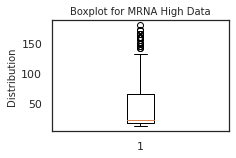

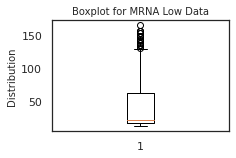

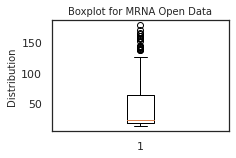

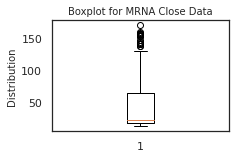

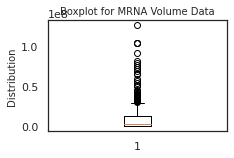

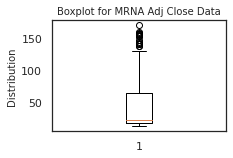

In [ ]:
## https://seaborn.pydata.org/generated/seaborn.boxplot.html

for col in quant_field_list:
  ax = plt.subplot(2, 2, 1)
  ax.boxplot(mrna[col] #, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = ".8"
             #color = 'blue', edgecolor = 'black'
             )
  ax.set_title('Boxplot for MRNA %s Data' % ( col), size = 10)
#    ax.set_xlabel(mrna[col], size = 10)
  ax.set_ylabel('Distribution', size= 10)

  plt.tight_layout()
  plt.show()

#  sns.boxplot(y = col, #x=col, data=mrna, palette="colorblind", hue='Date')




In [ ]:
#openbp = sns.boxplot(y="Open", data=mrna, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = ".8")
#highbp = sns.boxplot(y="High", data=mrna, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = ".47")
#lowbp = sns.boxplot(y="Low", data=mrna, saturation=0.25, width=0.3, linewidth=1.25, whis=0.5, color = ".57")
#closebp = sns.boxplot(y="Close", data=mrna, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = ".9")
#adjclosebp = sns.boxplot(y="Adj Close", data=mrna, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = ".55")
#volbp = sns.boxplot(y="Volume", data=mrna, saturation=0.75, width=0.3, linewidth=1.25, whis=0.5, color = "1")


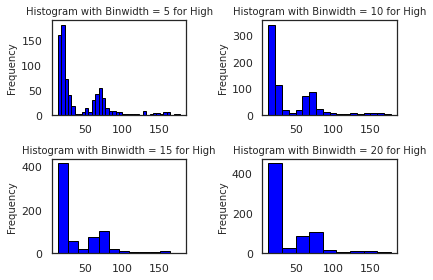

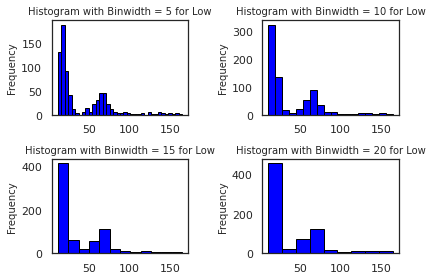

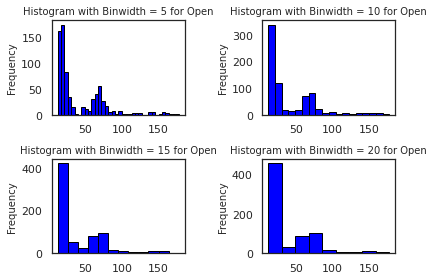

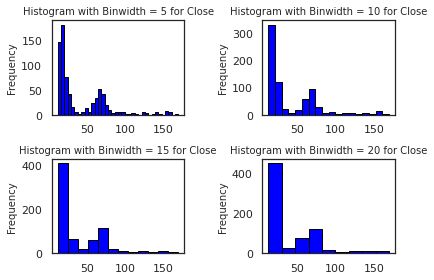

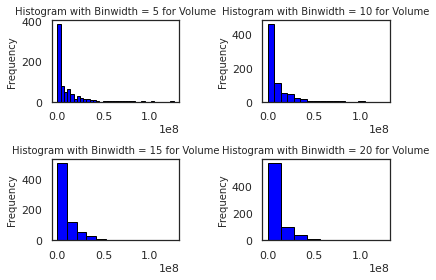

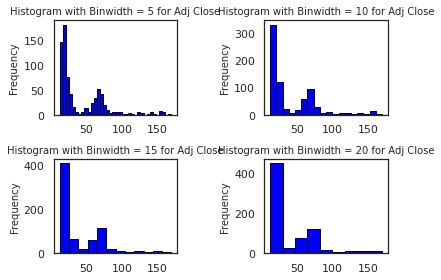

In [ ]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

#histograms with 4 different binwidths

for col in quant_field_list:
  for i, binwidth in enumerate([5, 10, 15, 20]):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(mrna[col], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    ax.set_title('Histogram with Binwidth = %d for %s' % (binwidth, col), size = 10)
#    ax.set_xlabel(mrna[col], size = 10)
    ax.set_ylabel('Frequency', size= 10)

  plt.tight_layout()
  plt.show()
             

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


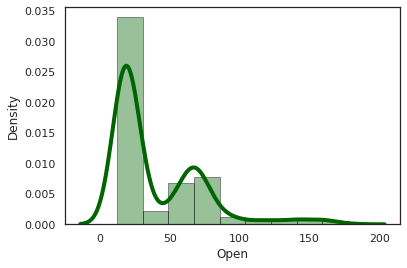

In [ ]:
#density plots, play with colors

sns.distplot(mrna['Open'], hist=True, kde=True,
             bins=int((np.quantile(mrna['Open'],0.75) - np.quantile(mrna['Open'],0.25))/5), color = 'darkgreen',
             hist_kws={'edgecolor':'black'},   
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


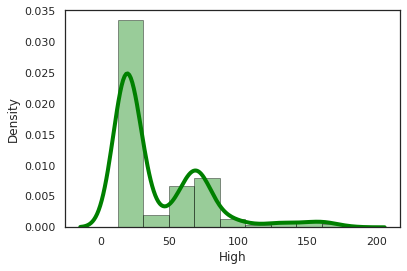

In [ ]:
#density plots

sns.distplot(mrna['High'], hist=True, kde=True,
             bins=int((np.quantile(mrna['High'],0.75) - np.quantile(mrna['High'],0.25))/5), color = 'green',
             hist_kws={'edgecolor':'black'},   
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


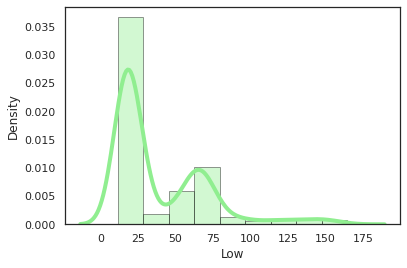

In [ ]:
#density plots

sns.distplot(mrna['Low'], hist=True, kde=True,
             bins=int((np.quantile(mrna['Low'],0.75) - np.quantile(mrna['Low'],0.25))/5), color = 'lightgreen',
             hist_kws={'edgecolor':'black'},   
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


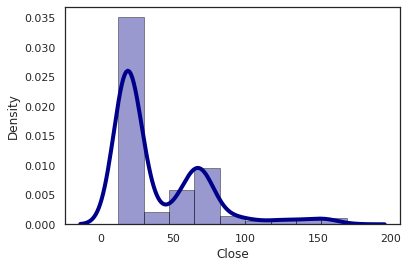

In [ ]:
#density plots

sns.distplot(mrna['Close'], hist=True, kde=True,
             bins=int((np.quantile(mrna['Close'],0.75) - np.quantile(mrna['Close'],0.25))/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},   
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


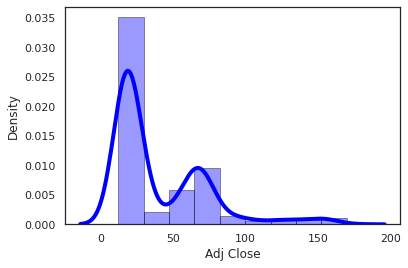

In [ ]:
#density plots

sns.distplot(mrna['Adj Close'], hist=True, kde=True,
             bins=int((np.quantile(mrna['Adj Close'],0.75) - np.quantile(mrna['Adj Close'],0.25))/5), color = 'blue',
             hist_kws={'edgecolor':'black'},   
             kde_kws={'linewidth': 4})

In [ ]:
#density plots  #log_vol = np.log(mrna["Volume"]) .... Erroring out - magnitude?

#sns.distplot(mrna["Volume"], hist=True, kde=True,
#             bins=int((np.quantile(mrna["Volume"],0.75) - np.quantile(mrna["Volume"],0.25))/5), color = 'lightblue',
#             hist_kws={'edgecolor':'black'},   
#             kde_kws={'linewidth': 4})

In [ ]:
## Generic way to do this if identify reason for hang-up on Volume (or exclude Volume)

#for col in quant_field_list:
#  ax = plt.subplot(2, 1, 1)
#  sns.distplot(mrna[col], hist = True, kde = True,
#                bins=int((np.quantile(mrna[col],0.75) - np.quantile(mrna[col],0.25))/5), color = 'darkblue',
#             hist_kws={'edgecolor':'black'},   
#             kde_kws={'linewidth': 4}
#              )
  
#  ax.set_title('Density Plot with Histogram for %s' % (col), size = 10)
##  ax.set_xlabel(mrna[col], size = 10)
#  ax.set_ylabel('Frequency', size= 10)

#  plt.tight_layout()
#  plt.show()

In [ ]:
# Examine the identified features from previous step with > 75% missing value

mrna.describe()

,High,Low,Open,Close,Volume,Adj Close
count,730.000000,730.000000,730.000000,730.000000,7.300000e+02,730.000000
mean,41.614726,38.769915,40.273625,40.274541,9.649895e+06,40.274541
std,33.806055,31.188425,32.650515,32.508656,1.476302e+07,32.508656
min,12.690000,11.540000,12.260000,12.260000,2.728000e+05,12.260000
25%,17.992500,17.110001,17.365000,17.505000,1.106575e+06,17.505000
50%,23.389999,21.410000,22.469999,22.270000,3.158800e+06,22.270000
75%,66.086998,62.270000,64.264999,64.307497,1.279960e+07,64.307497
max,178.500000,164.300003,177.660004,169.860001,1.255523e+08,169.860001


### Make necessary transformations to data





In [ ]:
# Engineer features. 

mrna["MA_200"] = 0          # needed for F_Vol200dMovRt below

mrna["F_Day_ROI"] = 0          #close/open – 1
mrna["F_NLog_Vol"] = 0            #log(volume)                     
mrna["F_Vol_Lag"] = 0             #volume(t) – volume(t-1)
mrna["F_Vol_Lag50"] = 0           #volume(t) – volume(t-50)        
mrna["F_Log5dMov"] = 0            #log(MA(5))                      
mrna["F_Close20dMov"] = 0         #ma(20)
mrna["F_Vol200dMovRt"] = 0        #volume(t)/MA(200) – 1           
mrna["F_Retn_Wk"] = 0             #close(t)/open(t-5) -1           
mrna["F_Retn_Fortnt"] = 0         #close(t)/open(t-10) -1          
mrna["F_Retn_Mth"] = 0            #close(t)/open(t-20)- 1          
mrna["F_StdClose"] = 0            #z-scores

# 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

In [ ]:
#ROI for day

mrna["F_Day_ROI"] = mrna["Close"]/mrna["Open"] - 1


In [ ]:
# np.log takes an array. math.log takes a number.

mrna["F_NLog_Vol"] = np.log(mrna["Volume"])


In [ ]:
# Volume lag.  

index_row = list(mrna["Volume"].index)
vol_t = mrna["Volume"].iloc[0]

for i in range(0, len(index_row)):             ## Consider special case for i = 0
    vol_t_1 = vol_t
    vol_t = mrna["Volume"].iloc[i]
    mrna["F_Vol_Lag"].iloc[i] = vol_t - vol_t_1     
    


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# F_Vol_Lag50 = volume(t) – volume(t-50)

#index_row = list(mrna["Volume"].index)
vol_t = mrna["Volume"].iloc[0]


for i in range(0,len(index_row)):
    if i < 50 :
        vol_t_50 = mrna["Volume"].iloc[i] - np.mean(mrna["Volume"]) 
    else:
        j = i - 50
        vol_t_50 = mrna["Volume"].iloc[j]
    vol_t = mrna["Volume"].iloc[i]
    mrna["F_Vol_Lag50"].iloc[i] = vol_t - vol_t_50


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# F_Log5dMov = log(MA(5))       TA_lib  sma()
#index_row = list(mrna["Close"].index)

for i in range(0, len(index_row)):
  if i >=5:
    mrna["F_Log5dMov"].iloc[i] = np.log(np.ma.average(mrna["Volume"].iloc[i-5:i]))
  else:
    mrna["F_Log5dMov"].iloc[i] = np.log(np.mean(mrna["Volume"]))                        #Consider different formula for first 4


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# F_Close20dMov = ma(20)

index_row = list(mrna["Close"].index)

for i in range(0, len(index_row)):
  if i >=20:
    mrna["F_Close20dMov"].iloc[i] = np.ma.average(mrna["Close"].iloc[i-20:i])
  else:
    mrna["F_Close20dMov"].iloc[i] = np.mean(mrna["Close"])                           #Consider different formula for first 19


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#index_row = list(mrna["Volume"].index)

for i in range(0, len(index_row)):
  if i >=200:
    mrna["MA_200"].iloc[i] = np.ma.average(mrna["Volume"].iloc[i-200:i])
  else:
    mrna["MA_200"].iloc[i] = np.mean(mrna["Volume"])                           #Consider different formula for first 199



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# F_Vol200dMovRt = volume(t)/MA(200) – 1  

mrna["F_Vol200dMovRt"] = mrna["Volume"] / mrna["MA_200"] - 1


In [ ]:
# F_Retn_Wk = close(t)/open(t-5) -1   ...... Check this calculation

for i in range(0,len(index_row)):
    if i > 4 :
        j = i - 5
        open_t_5 = mrna["Open"].iloc[j]
        close_t = mrna["Close"].iloc[i]
        mrna["F_Retn_Wk"] = close_t / open_t_5 - 1
    else:
        mrna["F_Retn_Wk"] = mrna["Close"].iloc[i] / np.mean(mrna["Open"]) - 1            #Consider different formula for first 5 records



In [ ]:
# F_Retn_Fortnt = close(t)/open(t-10) -1   ...Check calculations here, too
#index_row = list(mrna["Close"].index)

open_mean_10 = np.mean(mrna["Open"])

for i in range(0,len(index_row)):
    if i > 9 :
        j = i - 10
        open_t_10 = mrna["Open"].iloc[j]
        close_t = mrna["Close"].iloc[i]
        mrna["F_Retn_Fortnt"] = close_t / open_t_10 - 1
    else:
        mrna["F_Retn_Fortnt"] = mrna["Close"].iloc[i] / open_mean_10 - 1            #Consider different formula for first 9



In [ ]:
# F_Retn_Mth = close(t)/open(t-20)- 1          .... Check calculations

open_mean_20 = np.mean(mrna["Open"])

for i in range(0,len(index_row)):
    if i >= 20 :
        j = i - 20
        open_t_20 = mrna["Open"].iloc[j]
        close_t = mrna["Close"].iloc[i]
        mrna["F_Retn_Mth"] = close_t / open_t_20 - 1
    else:
        mrna["F_Retn_Mth"] = mrna["Close"].iloc[i] / open_mean_20 - 1               #Consider different formula for first 19


In [ ]:
# Scale using Z or normalization

mean_close = np.mean(mrna["Close"])
std_close = np.std(mrna["Close"])

mrna["F_StdClose"] = (mrna["Close"] - mean_close)/std_close


In [ ]:
#View after engineering

display(mrna.head())
mrna.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,MA_200,F_Day_ROI,F_NLog_Vol,F_Vol_Lag,F_Vol_Lag50,F_Log5dMov,F_Close20dMov,F_Vol200dMovRt,F_Retn_Wk,F_Retn_Fortnt,F_Retn_Mth,F_StdClose
0,2019-01-02,15.45,14.510,14.93,15.330000,2318100.0,15.330000,9.649895e+06,0.026792,14.656258,0.0,9.649895e+06,16.082458,40.274541,-0.759780,-0.170478,-0.258236,-0.345836,-0.767846
1,2019-01-03,16.08,15.200,15.49,15.500000,1588900.0,15.500000,9.649895e+06,0.000646,14.278553,-729200.0,9.649895e+06,16.082458,40.274541,-0.835345,-0.170478,-0.258236,-0.345836,-0.762613
2,2019-01-04,17.50,15.894,16.00,16.959999,1651800.0,16.959999,9.649895e+06,0.060000,14.317376,62900.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671
3,2019-01-05,17.50,15.894,16.00,16.959999,1651800.0,16.959999,9.649895e+06,0.060000,14.317376,0.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671
4,2019-01-06,17.50,15.894,16.00,16.959999,1651800.0,16.959999,9.649895e+06,0.060000,14.317376,0.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671


,Date,High,Low,Open,Close,Volume,Adj Close,MA_200,F_Day_ROI,F_NLog_Vol,F_Vol_Lag,F_Vol_Lag50,F_Log5dMov,F_Close20dMov,F_Vol200dMovRt,F_Retn_Wk,F_Retn_Fortnt,F_Retn_Mth,F_StdClose
725,2020-12-27,129.699997,122.720001,125.940002,123.389999,12720600.0,123.389999,18786333.5,-0.020248,16.358733,0.0,6879600.0,16.960547,144.057499,-0.322880,-0.170478,-0.258236,-0.345836,2.558471
726,2020-12-28,122.879997,111.050003,120.040001,111.400002,31088200.0,111.400002,18794564.5,-0.071976,17.252339,18367600.0,25247200.0,16.736384,142.250998,0.654106,-0.170478,-0.258236,-0.345836,2.189393
727,2020-12-29,116.250000,106.879997,107.795998,114.389999,23718800.0,114.389999,18789579.5,0.061171,16.981779,-7369400.0,3452000.0,16.612433,139.327998,0.262338,-0.170478,-0.258236,-0.345836,2.281432
728,2020-12-30,118.941002,108.800003,118.400002,111.129997,23965500.0,111.129997,18834459.0,-0.061402,16.992126,246700.0,13466100.0,16.738337,137.217999,0.272428,-0.170478,-0.258236,-0.345836,2.181082
729,2020-12-31,113.550003,102.660004,110.550003,104.470001,23369900.0,104.470001,18880572.0,-0.054998,16.966959,-595600.0,4793400.0,16.852516,134.989998,0.237775,-0.170478,-0.258236,-0.345836,1.976073


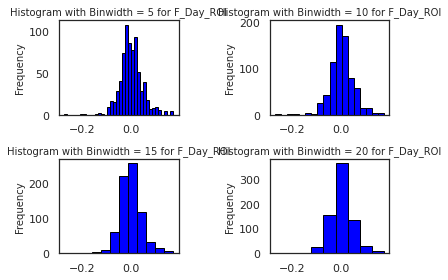

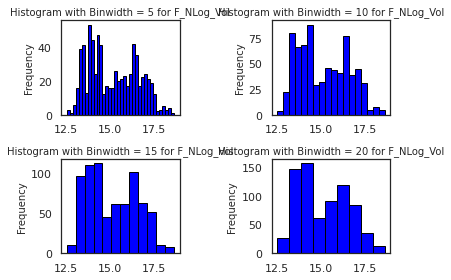

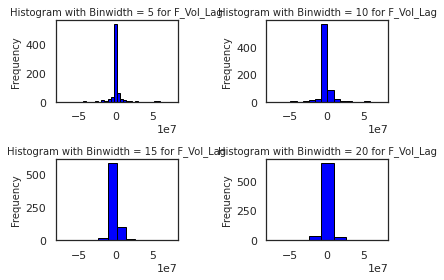

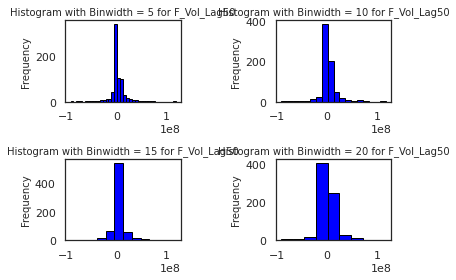

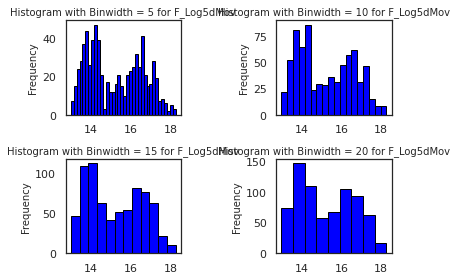

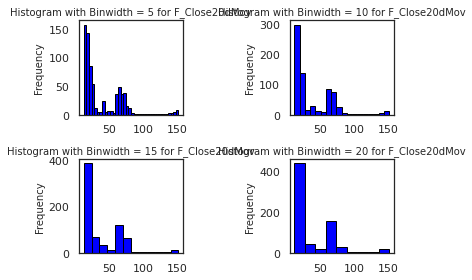

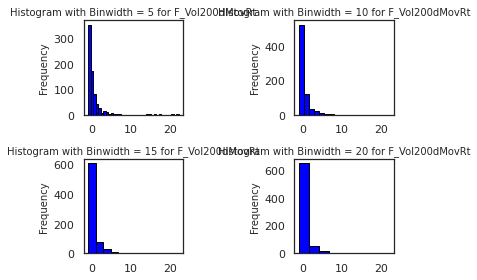

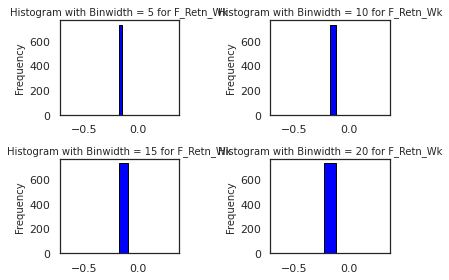

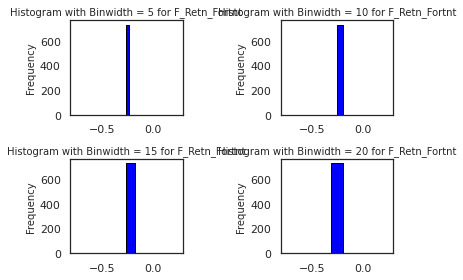

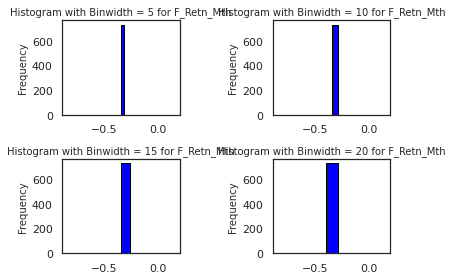

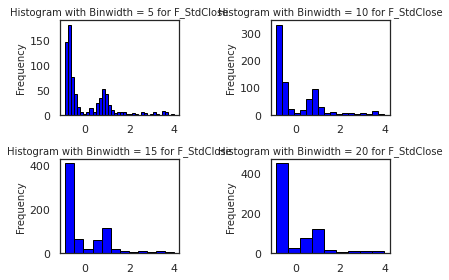

In [ ]:
#re-visualize 

feature_cols = [col for col in mrna if "F_" in col]

for col in feature_cols:
  for i, binwidth in enumerate([5, 10, 15, 20]):
    ax = plt.subplot(2, 2, i + 1)
    ax.hist(mrna[col], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    ax.set_title('Histogram with Binwidth = %d for %s' % (binwidth, col), size = 10)
#    ax.set_xlabel(mrna[col], size = 10)
    ax.set_ylabel('Frequency', size= 10)

  plt.tight_layout()
  plt.show()


In [ ]:
mrna_features = mrna.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_200'], axis = 1)

#print(mrna_features.corr())
#plt.subplots(figsize = (10,8))
#sns.heatmap(mrna_features.corr())                 

mrna_features.head()




,Date,F_Day_ROI,F_NLog_Vol,F_Vol_Lag,F_Vol_Lag50,F_Log5dMov,F_Close20dMov,F_Vol200dMovRt,F_Retn_Wk,F_Retn_Fortnt,F_Retn_Mth,F_StdClose
0,2019-01-02,0.026792,14.656258,0.0,9.649895e+06,16.082458,40.274541,-0.759780,-0.170478,-0.258236,-0.345836,-0.767846
1,2019-01-03,0.000646,14.278553,-729200.0,9.649895e+06,16.082458,40.274541,-0.835345,-0.170478,-0.258236,-0.345836,-0.762613
2,2019-01-04,0.060000,14.317376,62900.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671
3,2019-01-05,0.060000,14.317376,0.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671
4,2019-01-06,0.060000,14.317376,0.0,9.649895e+06,16.082458,40.274541,-0.828827,-0.170478,-0.258236,-0.345836,-0.717671


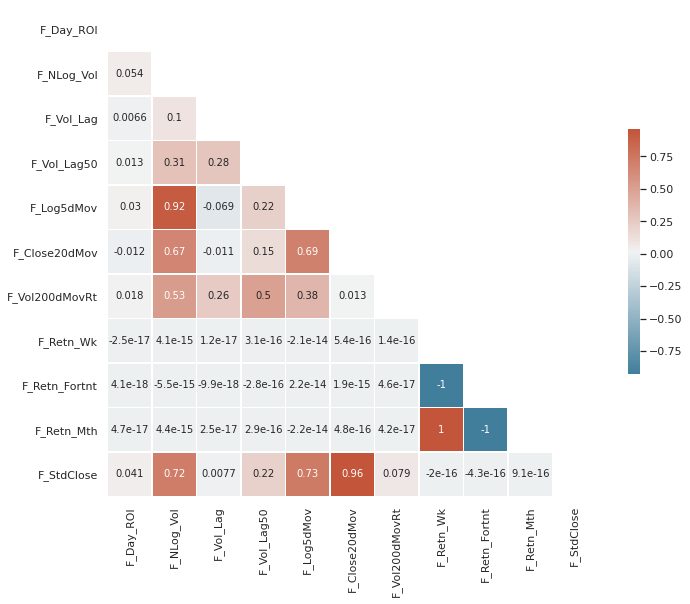

In [ ]:
# Generate a mask for the upper triangle
correlation = mrna_features.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, robust = True, annot = True,
            #center = .25, vmin = .05, vmax = .8, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# F_Retn_Wk, F_Retn_Fortnt, F_Retn_Mth correlate quite strongly. Examine selection for model.

In [ ]:
#Write to a csv file if necessary
#mrna.to_csv("MRNAclean.csv", index = False)